# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [9]:
# your answer here
path = 'Employee.csv'
data = pd.read_csv(path)
data.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [10]:
# your answer here-1st way
data.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [23]:
# your answer here-2nd way
data.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [22]:
# your answer here

data.pivot_table(index=["Department"], columns=["Title"], values=["Salary"])


Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [24]:
# your answer here
data.pivot_table(index=["Department"])

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want to know the information about the mean salary and number of employees in each department and for each job title

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [57]:
# your answer here
#data.pivot_table(index=["Department"], columns=["Salary"])

pd.pivot_table(data,index=["Department", "Title"],values=["Salary"],aggfunc=[np.median,max, min, np.std])


median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [59]:
# your answer here
pd.pivot_table(data,index=["Department", "Title"],values=["Salary"],aggfunc=[np.median,max, min, np.std],fill_value=0)


median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [67]:
# your answer here
pd.pivot_table(data,index=["Department"],values=["Salary"],aggfunc=['count', sum],fill_value=0)


,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [68]:
# your answer here
pd.pivot_table(data,index=["Department", "Title"],values=["Years"],aggfunc=[np.mean,sum],fill_value=0)


mean   sum
                     Years Years
Department Title                
HR         VP          8.0     8
           analyst     3.0     6
IT         VP          8.0     8
           analyst     1.5     3
           associate   7.0     7
Sales      associate   2.5     5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [73]:
# your answer here
path1= 'Fitbit.csv'
data = pd.read_csv(path1)
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [85]:
# your answer here
print(data.dtypes)

print(data.describe())

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object
       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max   

In [16]:
# your answer here

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [107]:
from scipy.stats import pearsonr

data[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


In [104]:
# your answer here
#The are correlated to a medium degree

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

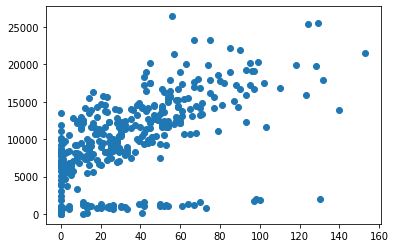

In [100]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x=data['Minutes Very Active'], y=data['Steps'])


#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
#as steps increase, very active minutes increase too

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [106]:
# your answer here
data[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

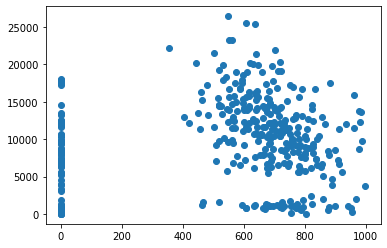

In [101]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x=data['Minutes Sedentary'], y=data['Steps'])


In [22]:
# Your comment here
No correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [108]:
# your answer here
data[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

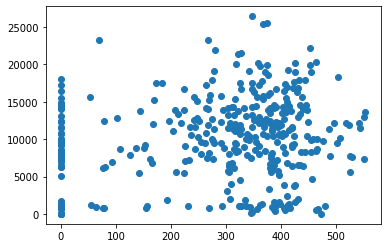

In [102]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x=data['MinutesOfSleep'], y=data['Steps'])
#No correlation

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

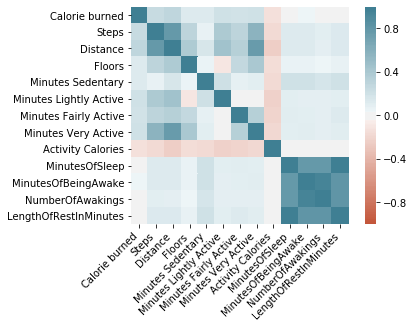

In [103]:
# your answer here
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [112]:
cor_fit = data.corr()


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here
#Distance, Minutes very active, Minutes Lightly Active

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [116]:
# your answer here
path3= 'Time_Grades.csv'
time_grades = pd.read_csv(path3)

In [117]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

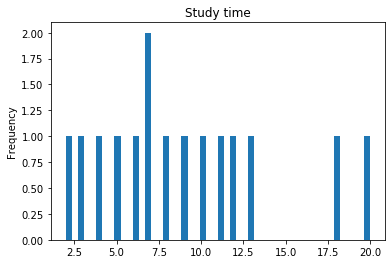

In [151]:
# your answer here
#x1 = time_grades[['Study time', 'Grade']]
#plt.hist(x1, label='Grade')


#x = time_grades[['Study time', 'Grade']]
#plt.hist(x, bins = 1)

import matplotlib
%matplotlib inline
# Plot Histogram on x
x = time_grades['Study time']
plt.hist(x, bins=50)
plt.gca().set(title='Study time', ylabel='Frequency');

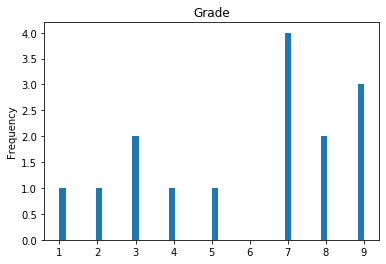

In [152]:
import matplotlib
%matplotlib inline
# Plot Histogram on x
x = time_grades['Grade']
plt.hist(x, bins=50)
plt.gca().set(title='Grade', ylabel='Frequency');

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [141]:
# your answer here-Pearson 
time_grades[['Study time', 'Grade']].corr()
#YES, there is a correlation

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [144]:
## your answer here-Spearman
time_grades[['Study time', 'Grade']].corr(method= 'spearman')


,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

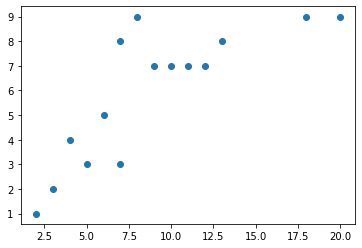

In [146]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [34]:
#your comment here
#As Time Increases, grades also increase

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
#The Pearson correlation evaluates the linear relationship between two continuous variables. ... The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.